In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('03_Clustering_Marketing.csv')

In [3]:
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [4]:
df.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [5]:
from collections import Counter

In [6]:
Counter(df['gender'])

Counter({nan: 1337, 'F': 11057, 'M': 2606})

In [7]:
df['gender'].fillna('not disclosed',inplace=True)

In [8]:
Counter(df['gender'])

Counter({'not disclosed': 1337, 'F': 11057, 'M': 2606})

In [9]:
Counter(df['age'])

Counter({nan: 2496,
         '17.41': 15,
         '17.511': 13,
         '16.657': 9,
         '18.034': 11,
         '18.53': 9,
         '19.168': 7,
         '18.535': 9,
         '16.83': 10,
         '17.697': 9,
         '15.696': 10,
         '16.569': 9,
         '16.78': 5,
         '17.15': 9,
         '18.045': 11,
         '18.261': 16,
         '18.149': 11,
         '18.136': 14,
         '16.821': 9,
         '17.095': 6,
         '15.302': 6,
         '18.037': 9,
         '17.503': 9,
         '16.873': 9,
         '15.702': 4,
         '17.383': 14,
         '18.437': 6,
         '17.73': 15,
         '18.021': 5,
         '18.171': 10,
         '16.008': 10,
         '17.615': 11,
         '15.578': 3,
         '19.28': 4,
         '16.285': 11,
         '16.936': 17,
         '18.99': 6,
         '17.941': 8,
         '14.984': 4,
         '18.579': 10,
         '17.202': 9,
         '19.488': 3,
         '15.551': 12,
         '17.914': 10,
         '15.907': 10,


In [10]:
df['age']=pd.to_numeric(df['age'],errors='coerce')

In [11]:
df['age']

0           NaN
1        17.410
2        17.511
3           NaN
4        16.657
          ...  
14995    16.329
14996    16.545
14997    17.999
14998    17.903
14999    15.811
Name: age, Length: 15000, dtype: float64

In [12]:
A=df[['gradyear','age']].groupby(['gradyear']).mean()
A

,age
gradyear,
2006,19.010786
2007,18.400134
2008,17.593006
2009,16.886244


In [13]:
df['age']=df['age'].fillna(df.groupby('gradyear')['age'].transform('mean'))

In [14]:
df['age']=df.groupby('gradyear')['age'].transform(lambda x:x.fillna(x.mean()))

In [15]:
df['age']

0        18.400134
1        17.410000
2        17.511000
3        19.010786
4        16.657000
           ...    
14995    16.329000
14996    16.545000
14997    17.999000
14998    17.903000
14999    15.811000
Name: age, Length: 15000, dtype: float64

In [16]:
df.groupby('gradyear')['age'].mean()

gradyear
2006    19.010786
2007    18.400134
2008    17.593006
2009    16.886244
Name: age, dtype: float64

In [17]:
df=pd.get_dummies(df,columns=['gender'],drop_first=True)

In [18]:
df.head()

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_M,gender_not disclosed
0,2007,18.400134,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2007,17.410000,49,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2007,17.511000,41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2006,19.010786,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,16.657000,1,0,0,0,0,0,1,0,...,0,3,0,0,0,0,0,0,0,0


In [19]:
df['age'].min()

4.309

In [20]:
q1=df['age'].quantile(0.25)

In [21]:
q3=df['age'].quantile(0.75)

In [22]:
iqr=q3-q1

In [23]:
df=df[(df['age']>(q1-1.5*iqr))& (df['age']<(q3+1.5*iqr))]

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
df.describe()

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_M,gender_not disclosed
count,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,...,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000
mean,2007.494806,17.392977,29.874528,0.268011,0.256543,0.222342,0.160955,0.143888,0.135726,0.105842,...,0.358877,0.150634,0.071843,0.051673,0.186050,0.118389,0.092013,0.060982,0.173705,0.089247
std,1.116792,1.134571,35.415599,0.789793,0.702314,0.922233,0.740314,0.640768,0.551162,0.504913,...,0.730628,0.479959,0.356746,0.281477,0.610732,0.456221,0.421900,0.348750,0.378868,0.285110
min,2006.000000,13.843000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,16.539000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,17.446000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,18.400134,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,21.065000,605.000000,22.000000,9.000000,22.000000,17.000000,14.000000,31.000000,8.000000,...,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000,1.000000,1.000000


In [26]:
ss=StandardScaler()

In [27]:
df.columns

Index(['gradyear', 'age', 'NumberOffriends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs',
       'gender_M', 'gender_not disclosed'],
      dtype='object')

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans=KMeans

In [30]:
wcss=[]

In [31]:
for i in range(1,20):
    x=kmeans(n_clusters=i,init='k-means++').fit(df)
    wcss.append(x.inertia_)

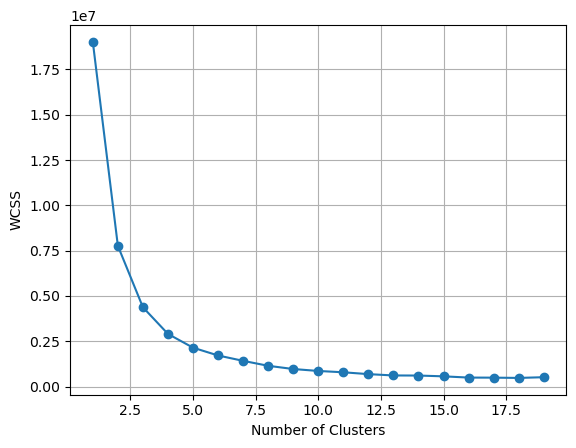

In [32]:
plt.plot(range(1,20),wcss,marker='o')
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [33]:
kmeans=KMeans(n_clusters=5, init='k-means++')
kmeans.fit(df)

KMeans(n_clusters=5)

In [34]:
kmeans.labels_

array([4, 3, 0, ..., 0, 0, 0])

In [35]:
df['Cluster']=kmeans.labels_

In [42]:
df.groupby('Cluster').mean()

,gradyear,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_M,gender_not disclosed
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2007.483318,17.382186,28.504866,0.297961,0.283596,0.245366,0.163114,0.167748,0.146895,0.104263,...,0.367702,0.156395,0.071131,0.050741,0.200880,0.125811,0.092910,0.057461,0.180491,0.070667
1,2007.644540,17.276341,104.849036,0.337259,0.300857,0.278373,0.275161,0.186296,0.144540,0.198073,...,0.479657,0.152034,0.116702,0.080300,0.191649,0.144540,0.107066,0.039615,0.109208,0.099572
2,2007.864407,17.020902,199.135593,0.322034,0.361582,0.197740,0.146893,0.242938,0.203390,0.197740,...,0.508475,0.242938,0.079096,0.112994,0.248588,0.169492,0.158192,0.016949,0.084746,0.050847
3,2007.610008,17.264190,59.138273,0.330405,0.279985,0.255539,0.228801,0.193277,0.171123,0.120321,...,0.438885,0.166921,0.097403,0.073338,0.187548,0.134836,0.091673,0.063407,0.141711,0.079832
4,2007.427349,17.475368,4.695825,0.213896,0.221419,0.187786,0.118012,0.101195,0.111963,0.086148,...,0.301814,0.138073,0.056055,0.038354,0.173624,0.102375,0.087771,0.066381,0.192949,0.104293


In [39]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_score(df.drop('Cluster',axis=1),df['Cluster'])

0.5237464768221444